In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
from pydataset import data
from nycflights13 import flights
import requests
import janitor as jn

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
#Read file
switzerland = pd.read_excel("../data/Switzerland_Energy.xlsx")

# Convert the 'Year' and 'Value' columns to appropriate data types
switzerland['Year'] = switzerland['Year'].astype(int)
switzerland['Value'] = switzerland['Value'].astype(float)

#Check data types
print(switzerland.dtypes)

Country       object
Product       object
Flow          object
NoCountry     object
NoProduct     object
NoFlow        object
Year           int64
Value        float64
dtype: object


In [3]:
# Filter the data for different sources of non-renewable energy consumption and renewable total energy supply
co2_emission = switzerland[(switzerland['Product'] == 'CO2 emissions') & 
                                     (switzerland['Year'] >= 1990)].copy()

renewable_supply = switzerland[(switzerland['Product'] == 'Renewables and waste') & 
                                     (switzerland['Flow'] == 'Total energy supply (PJ)') & 
                                     (switzerland['Year'] >= 1990)].copy()



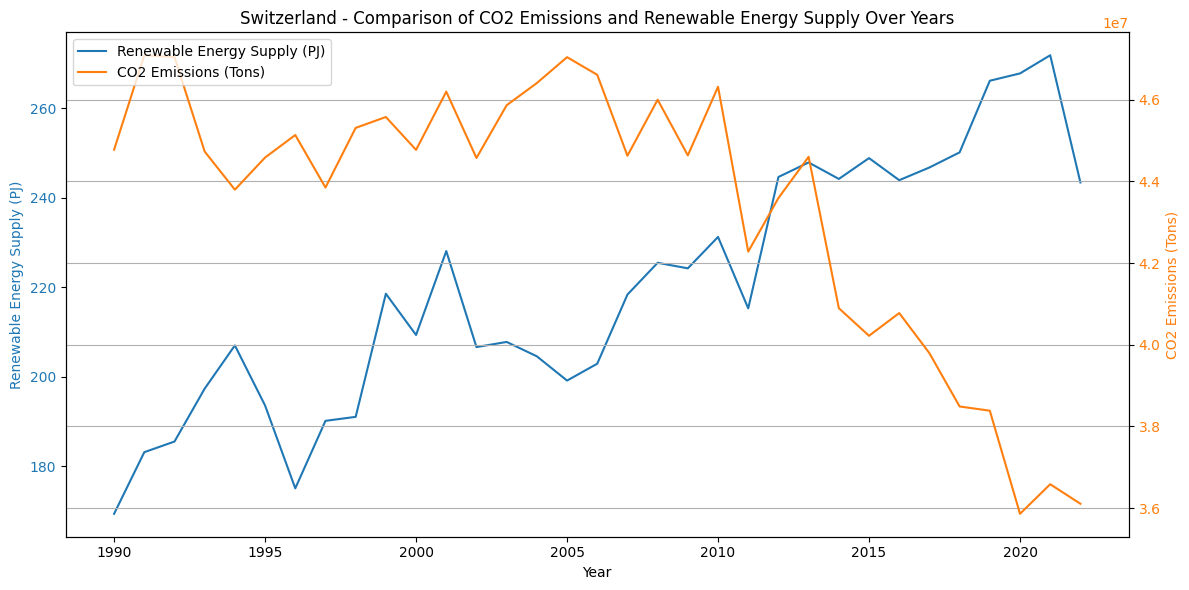

In [4]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot renewable energy supply
line1 = ax1.plot(renewable_supply['Year'], renewable_supply['Value'], color='#1f77b4', label='Renewable Energy Supply (PJ)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Renewable Energy Supply (PJ)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Create a second y-axis for CO2 emissions
ax2 = ax1.twinx()
line2 = ax2.plot(co2_emission['Year'], co2_emission['Value'], color='#ff7f0e', label='CO2 Emissions (Tons)')
ax2.set_ylabel('CO2 Emissions (Tons)', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Add title and grid
plt.title('Switzerland - Comparison of CO2 Emissions and Renewable Energy Supply Over Years')
fig.tight_layout()
plt.grid(True)

# Combine legends from both lines
lines = line1 + line2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc="upper left")

plt.show()


In [5]:
# Calculate the correlation coefficient and p-value for renewable energy supply vs CO2 emissions
correlation_renewable_co2, p_value_renewable_co2 = pearsonr(renewable_supply['Value'], co2_emission['Value'])
print(f'Renewable Energy Supply vs CO2 Emissions - Correlation coefficient: {correlation_renewable_co2}, P-value: {p_value_renewable_co2}')

Renewable Energy Supply vs CO2 Emissions - Correlation coefficient: 0.6656026999877063, P-value: 2.3697103377501533e-05


In [6]:
coal_consumption = switzerland[(switzerland['Product'] == 'Coal, peat and oil shale') & 
                                 (switzerland['Flow'] == 'Total final consumption (PJ)')& 
                                     (switzerland['Year'] >= 1990)].copy()

oil_products_consumption = switzerland[(switzerland['Product'] == 'Oil products') & 
                                 (switzerland['Flow'] == 'Total final consumption (PJ)')& 
                                     (switzerland['Year'] >= 1990)].copy()

natural_gas_consumption = switzerland[(switzerland['Product'] == 'Natural gas') & 
                                 (switzerland['Flow'] == 'Total final consumption (PJ)')& 
                                     (switzerland['Year'] >= 1990)].copy()

# Combine the three dataframes
non_renewable_consumption = pd.concat([coal_consumption, oil_products_consumption, natural_gas_consumption])

# Group by 'Year' and sum the 'Value' for each year
non_renewable_consumption = non_renewable_consumption.groupby('Year')['Value'].sum().reset_index()

# Rename the columns for clarity
non_renewable_consumption.columns = ['Year', 'Value']

non_renewable_consumption.head()



,Year,Value
0,1990,544.702940
1,1991,573.922550
2,1992,576.192691
3,1993,550.671897
4,1994,537.308289


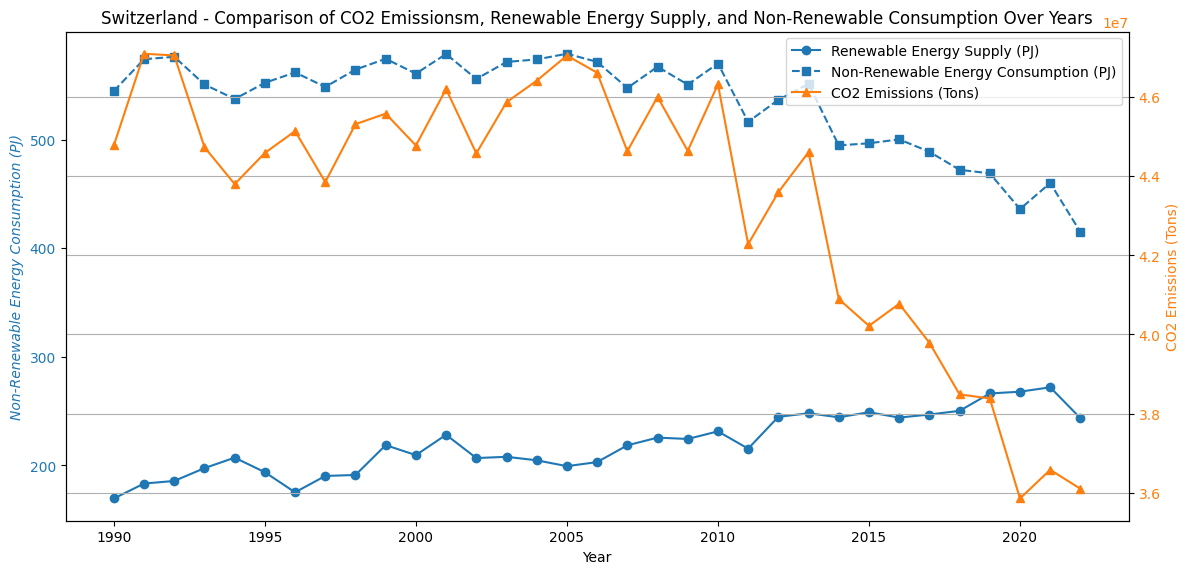

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot renewable energy supply
line1 = ax1.plot(renewable_supply['Year'], renewable_supply['Value'], color='#1f77b4', marker='o', label='Renewable Energy Supply (PJ)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Renewable Energy Supply (PJ)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Plot non-renewable energy consumption with a dashed line
line2 = ax1.plot(non_renewable_consumption['Year'], non_renewable_consumption['Value'], color='#1f77b4', marker='s', linestyle='--', label='Non-Renewable Energy Consumption (PJ)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Non-Renewable Energy Consumption (PJ)', color='#1f77b4', style='oblique')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Create a second y-axis for CO2 emissions
ax2 = ax1.twinx()
line3 = ax2.plot(co2_emission['Year'], co2_emission['Value'], color='#ff7f0e', marker='^', label='CO2 Emissions (Tons)')
ax2.set_ylabel('CO2 Emissions (Tons)', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Add title and grid
plt.title('Switzerland - Comparison of CO2 Emissionsm, Renewable Energy Supply, and Non-Renewable Consumption Over Years')
fig.tight_layout()
plt.grid(True)

# Combine legends from both lines
lines = line1 + line2 + line3
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc="upper right")

plt.show()


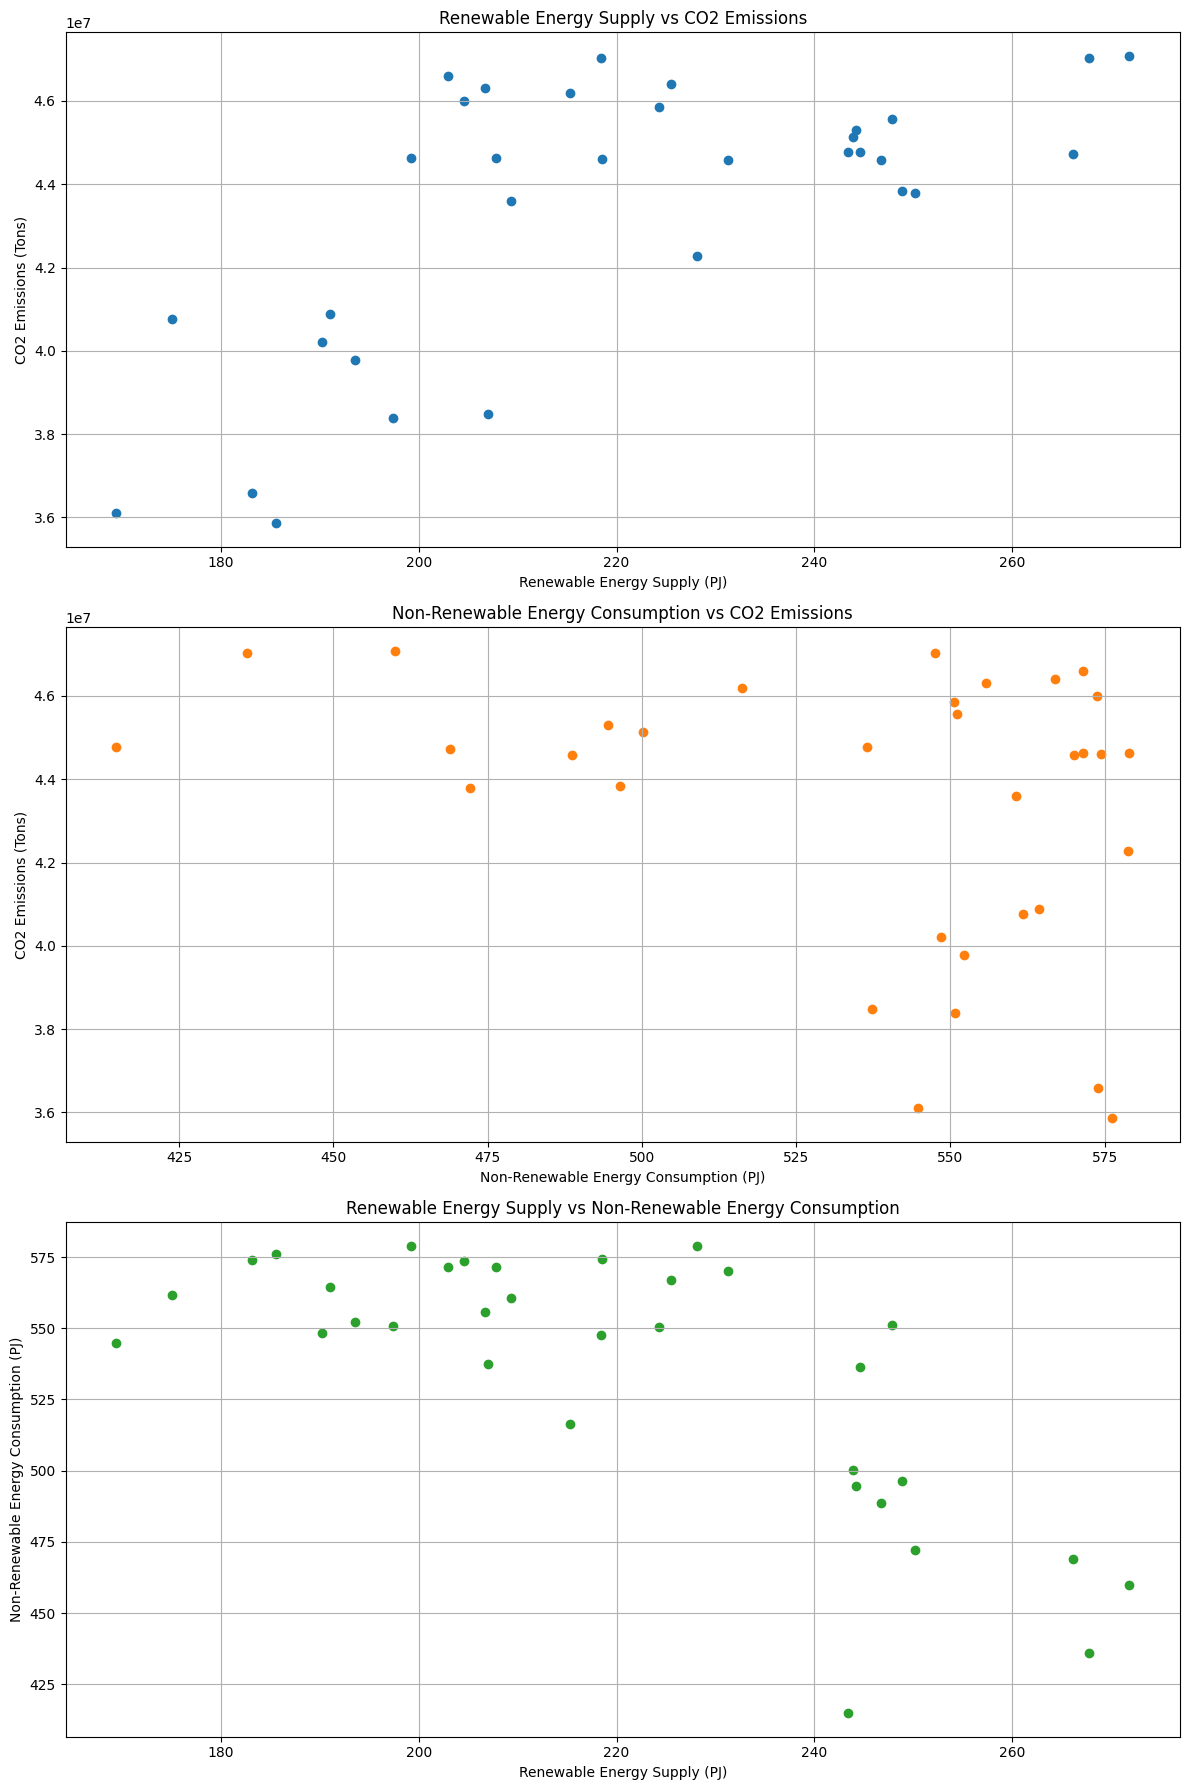

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Renewable Energy Supply vs CO2 Emissions
axs[0].scatter(renewable_supply['Value'], co2_emission['Value'], color='#1f77b4')
axs[0].set_xlabel('Renewable Energy Supply (PJ)')
axs[0].set_ylabel('CO2 Emissions (Tons)')
axs[0].set_title('Renewable Energy Supply vs CO2 Emissions')
axs[0].grid(True)

# Plot 2: Non-Renewable Energy Consumption vs CO2 Emissions
axs[1].scatter(non_renewable_consumption['Value'], co2_emission['Value'], color='#ff7f0e')
axs[1].set_xlabel('Non-Renewable Energy Consumption (PJ)')
axs[1].set_ylabel('CO2 Emissions (Tons)')
axs[1].set_title('Non-Renewable Energy Consumption vs CO2 Emissions')
axs[1].grid(True)

# Plot 3: Renewable Energy Supply vs Non-Renewable Energy Consumption
axs[2].scatter(renewable_supply['Value'], non_renewable_consumption['Value'], color='#2ca02c')
axs[2].set_xlabel('Renewable Energy Supply (PJ)')
axs[2].set_ylabel('Non-Renewable Energy Consumption (PJ)')
axs[2].set_title('Renewable Energy Supply vs Non-Renewable Energy Consumption')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [9]:
# Calculate the correlation coefficient and p-value for renewable energy supply vs non-renewable energy consumption
correlation_renewable_non_renewable, p_value_renewable_non_renewable = pearsonr(renewable_supply['Value'], non_renewable_consumption['Value'])
print(f'Renewable Energy Supply vs Non-Renewable Energy Consumption - Correlation coefficient: {correlation_renewable_non_renewable}, P-value: {p_value_renewable_non_renewable}')

# Calculate the correlation coefficient and p-value for renewable energy supply vs CO2 emissions
correlation_renewable_co2, p_value_renewable_co2 = pearsonr(renewable_supply['Value'], co2_emission['Value'])
print(f'Renewable Energy Supply vs CO2 Emissions - Correlation coefficient: {correlation_renewable_co2}, P-value: {p_value_renewable_co2}')

# Calculate the correlation coefficient and p-value for non-renewable energy consumption vs CO2 emissions
correlation_non_renewable_co2, p_value_non_renewable_co2 = pearsonr(non_renewable_consumption['Value'], co2_emission['Value'])
print(f'Non-Renewable Energy Consumption vs CO2 Emissions - Correlation coefficient: {correlation_non_renewable_co2}, P-value: {p_value_non_renewable_co2}')

Renewable Energy Supply vs Non-Renewable Energy Consumption - Correlation coefficient: -0.726158092600973, P-value: 1.7242347865966211e-06
Renewable Energy Supply vs CO2 Emissions - Correlation coefficient: 0.6656026999877063, P-value: 2.3697103377501533e-05
Non-Renewable Energy Consumption vs CO2 Emissions - Correlation coefficient: -0.31857570398528323, P-value: 0.07077459984684066


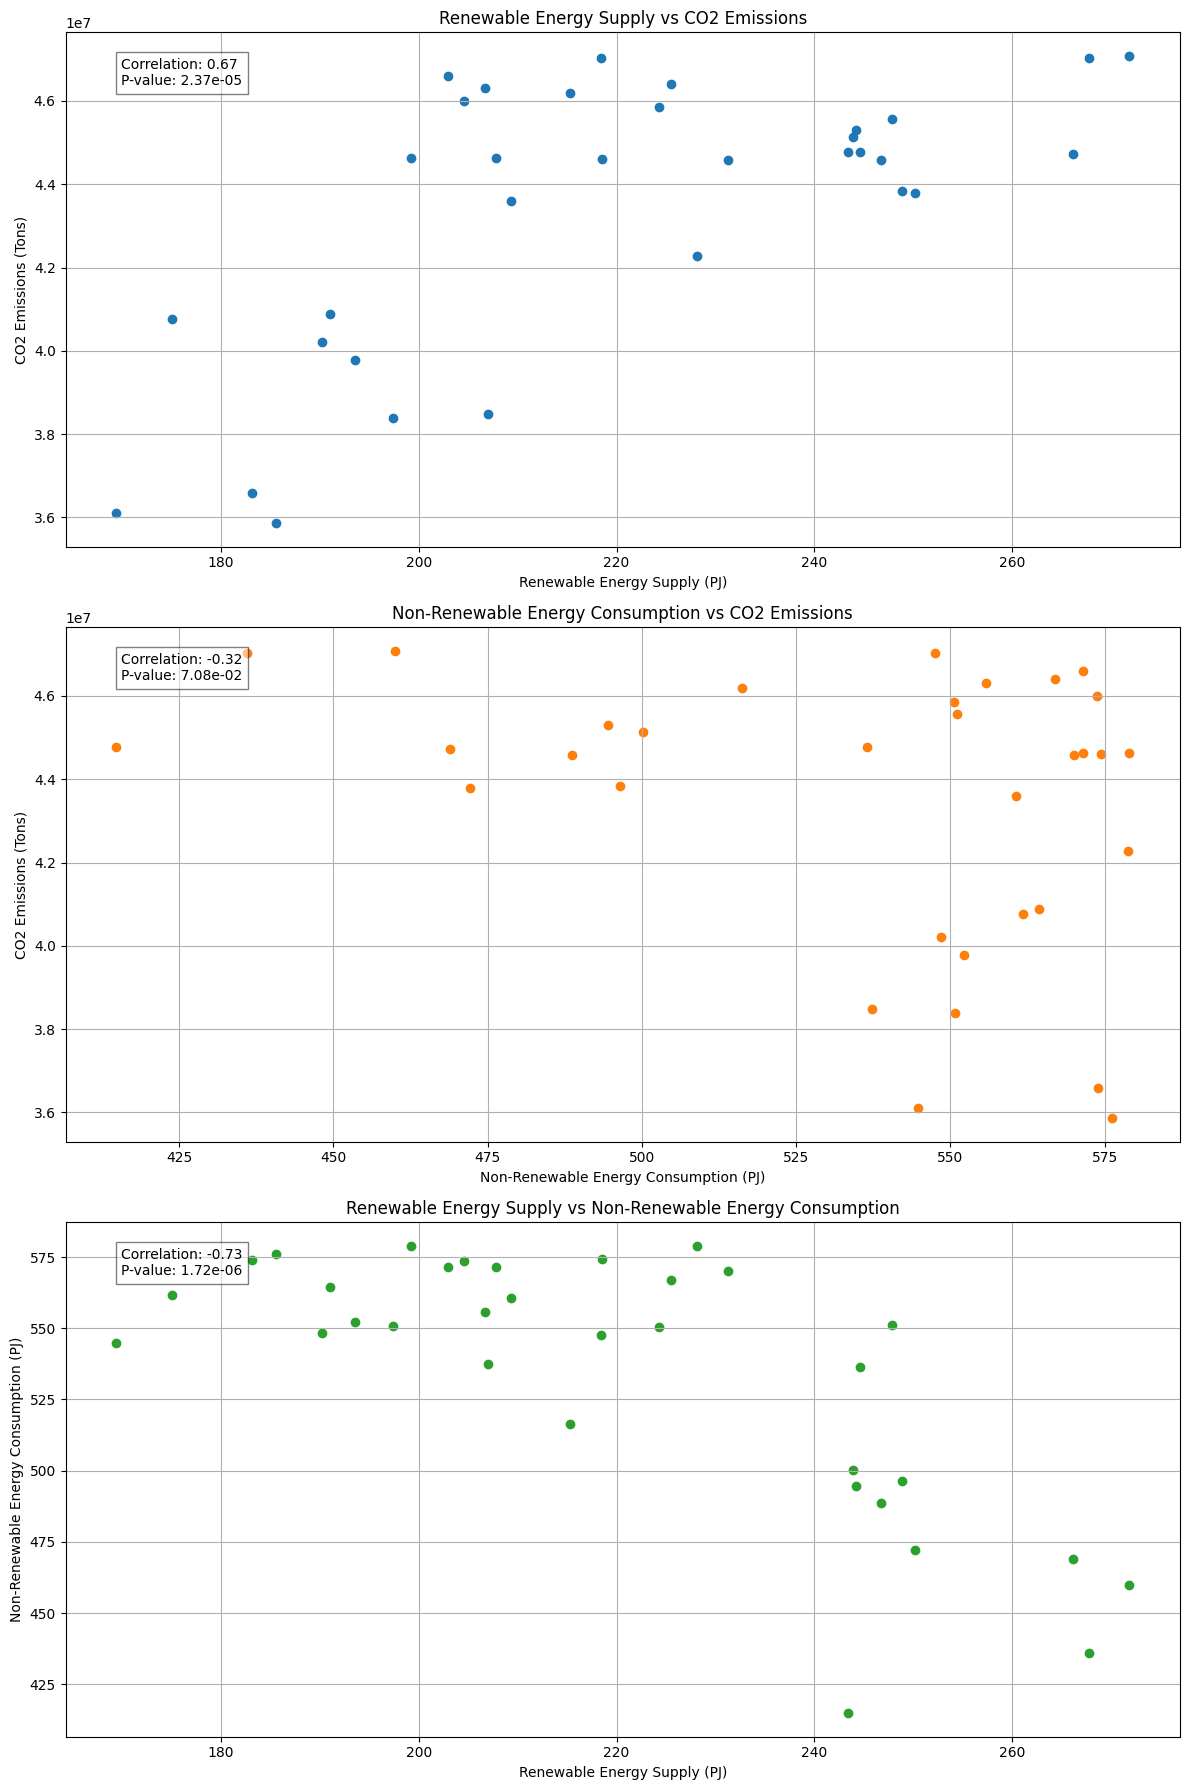

In [10]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Calculate correlations and p-values
corr1, pval1 = pearsonr(renewable_supply['Value'], co2_emission['Value'])
corr2, pval2 = pearsonr(non_renewable_consumption['Value'], co2_emission['Value'])
corr3, pval3 = pearsonr(renewable_supply['Value'], non_renewable_consumption['Value'])

# Plot 1: Renewable Energy Supply vs CO2 Emissions
axs[0].scatter(renewable_supply['Value'], co2_emission['Value'], color='#1f77b4')
axs[0].set_xlabel('Renewable Energy Supply (PJ)')
axs[0].set_ylabel('CO2 Emissions (Tons)')
axs[0].set_title('Renewable Energy Supply vs CO2 Emissions')
axs[0].grid(True)
# Add correlation and p-value
axs[0].text(0.05, 0.95, f'Correlation: {corr1:.2f}\nP-value: {pval1:.2e}', transform=axs[0].transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Plot 2: Non-Renewable Energy Consumption vs CO2 Emissions
axs[1].scatter(non_renewable_consumption['Value'], co2_emission['Value'], color='#ff7f0e')
axs[1].set_xlabel('Non-Renewable Energy Consumption (PJ)')
axs[1].set_ylabel('CO2 Emissions (Tons)')
axs[1].set_title('Non-Renewable Energy Consumption vs CO2 Emissions')
axs[1].grid(True)
# Add correlation and p-value
axs[1].text(0.05, 0.95, f'Correlation: {corr2:.2f}\nP-value: {pval2:.2e}', transform=axs[1].transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Plot 3: Renewable Energy Supply vs Non-Renewable Energy Consumption
axs[2].scatter(renewable_supply['Value'], non_renewable_consumption['Value'], color='#2ca02c')
axs[2].set_xlabel('Renewable Energy Supply (PJ)')
axs[2].set_ylabel('Non-Renewable Energy Consumption (PJ)')
axs[2].set_title('Renewable Energy Supply vs Non-Renewable Energy Consumption')
axs[2].grid(True)
# Add correlation and p-value
axs[2].text(0.05, 0.95, f'Correlation: {corr3:.2f}\nP-value: {pval3:.2e}', transform=axs[2].transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()
